# Apprendre la Machine Learning avec TensorFlow et MNIST

## Sommaire

### Introduction Machine Learning
- Pourquoi la Machine Learning ?
- GO et les échecs : pas du tout la même IA !
- la différence entre les algorithmes

### Introduction neurone biologique
- Qu'est-ce qu'un neurone ?

### Introduction aux réseaux de neurones
- recçoit une information/valeur et retransmet une autre
- chaque neurone a un poids (WEIGHT) et une biais
- Les principes (inputs, outputs, real_labels, predictions)
- raisonner en probabilité (softmax)
- backpropagation
- quelques applications (météo, classification d'images, classification de textes, trading)

### MNIST
- reconnaître des chiffres écrits à la main entre 0 et 9
- un problème en 784 dimensions (28*28px)
- Un réseau simple pour MNIST
- visualiser le dataset
- Pourquoi des vectueurs ? Pour l'écart des labels et des predictions par exemple

### Introduction à TensorFlow
- raisonnement par batch
- définir les inputs / real_labels / predictions
- définir le graphe
- définir la perte (loss -> écart entre le label reel et la prediction)
- définir l'optimizer (son but est de modifier les Variables du graphe pour minimiser la perte -> toute la magie est là !)

### Deep learning
- Le deep learning
- raisonnement en layer

### Aller plus loin
- visualiser nos metrics
- visualiser notre classification en 3D avec tensorboard
- RELU
- overfitting
- dropout
- learning rate
- Pourquoi pas 100% d'accuracy ?

## La pratique

In [44]:
import tensorflow as tf
import numpy as np

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
mnist.train.images[0].shape

(784,)

In [6]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [7]:
import matplotlib.pyplot as plt

In [8]:
img = mnist.train.images[98]

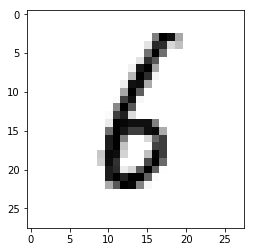

In [9]:
plt.imshow(img.reshape(28,28), cmap='gray_r')

In [10]:
img = mnist.train.labels[98]

In [11]:
import numpy as np

In [12]:
np.argmax(img)

6

## Définir le graphe

In [13]:
inputs = tf.placeholder(tf.float32, [None, 784])

In [14]:
outputs = tf.placeholder(tf.float32, [None, 10])

In [15]:
W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
b1 = tf.Variable(tf.zeros([200]))

In [16]:
W2 = tf.Variable(tf.truncated_normal([200, 100], stddev=0.1))
b2 = tf.Variable(tf.zeros([100]))

In [17]:
W3 = tf.Variable(tf.truncated_normal([100, 60], stddev=0.1))
b3 = tf.Variable(tf.zeros([60]))

In [18]:
W4 = tf.Variable(tf.truncated_normal([60, 20], stddev=0.1))
b4 = tf.Variable(tf.zeros([20]))

In [19]:
W5 = tf.Variable(tf.truncated_normal([20, 10], stddev=0.1))
b5 = tf.Variable(tf.zeros([10]))

In [20]:
layer1 = tf.nn.relu(tf.matmul(inputs, W1) + b1)
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)
layer4 = tf.matmul(layer3, W4) + b4

In [21]:
logits = tf.matmul(layer4, W5) + b5
predictions = tf.nn.softmax(logits)

## Definir la récompense

In [22]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=outputs))

In [23]:
optimizer = tf.train.AdamOptimizer().minimize(loss)

## Initialiser le graphe

In [24]:
sess = tf.Session()

In [25]:
sess.run(tf.global_variables_initializer())

## Training

In [26]:
for _ in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    
    sess.run(optimizer, feed_dict={inputs: batch_xs, outputs: batch_ys})

## Accuracy

In [27]:
correct_predictions = tf.equal(tf.argmax(predictions, 1), tf.argmax(outputs, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [28]:
sess.run(accuracy, feed_dict={inputs: mnist.test.images, outputs: mnist.test.labels })

0.9775

In [33]:
predictions = sess.run(predictions, feed_dict={inputs: mnist.test.images[0:10]})

In [35]:
np.argmax(predictions, 1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [37]:
labels = mnist.test.labels[0:10]

In [39]:
np.argmax(labels, 1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])